# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as Xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import cross_val_score, learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [145]:
data = pd.read_csv(r'https://raw.githubusercontent.com/wildan-wicaksono/Ship-Perfomance/refs/heads/main/Dataset_clustering.csv')
data.head(7)

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,1
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,3
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,4
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,3
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,2
5,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,7,53.174898,1
6,Fish Carrier,Transoceanic,Heavy Fuel Oil (HFO),Critical,20.433119,2505.043509,270.118588,8.455264,Rough,1191.436412,434449.263514,739431.825390,29.040420,3,58.508635,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [146]:
cluster_labels = data['Cluster']
data = data.drop('Cluster', axis=1)

In [147]:
scaler = MinMaxScaler()

In [148]:
categorical_features = data.select_dtypes(include='object').columns
data[categorical_features]

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,Moderate
1,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,Container Ship,Long-haul,Diesel,Fair,Moderate
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,Fish Carrier,Transoceanic,Diesel,Fair,Moderate
...,...,...,...,...,...
2731,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate
2732,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,Calm
2733,Container Ship,Short-haul,Steam Turbine,Critical,Calm
2734,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate


In [149]:
data_encode = pd.get_dummies(data, columns=['Ship_Type', 'Engine_Type', 'Route_Type'])
data_encode = data_encode.replace({True:1, False:0})
data_encode.head()

<ipython-input-149-9033ff532a99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encode = data_encode.replace({True:1, False:0})


,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1


In [150]:
label_encoder = LabelEncoder()
feature_ordinal = ['Weather_Condition', 'Maintenance_Status']

for feature in feature_ordinal:
  data_encode[feature] = label_encoder.fit_transform(data_encode[feature])

data_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,2,13.852798,2161.282358,831.355653,14.612775,0,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,0,16.813713,1343.608006,1376.460622,9.306518,0,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


In [151]:
data_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,2,13.852798,2161.282358,831.355653,14.612775,0,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,0,16.813713,1343.608006,1376.460622,9.306518,0,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


In [152]:
col = data_encode.columns
data_encode[col] = scaler.fit_transform(data_encode[col])

In [153]:
data_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [154]:
data_encode.insert(0, 'Cluster', cluster_labels)
data_encode

,Cluster,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,1,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,0,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2732,0,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2733,3,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2734,0,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [155]:
correlation_matrix = data_encode.corr()
print(correlation_matrix['Cluster'].sort_values(ascending=False))

Cluster                             1.000000
Engine_Type_Steam Turbine           0.445635
Engine_Type_Diesel                  0.412918
Ship_Type_Container Ship            0.182072
Route_Type_Coastal                  0.147279
Maintenance_Status                  0.044292
Route_Type_Long-haul                0.041851
Cargo_Weight_tons                   0.037114
Average_Load_Percentage             0.032986
Turnaround_Time_hours               0.018629
Revenue_per_Voyage_USD              0.005523
Weekly_Voyage_Count                 0.003500
Distance_Traveled_nm                0.003387
Draft_meters                       -0.000846
Weather_Condition                  -0.005727
Engine_Power_kW                    -0.010768
Operational_Cost_USD               -0.024162
Speed_Over_Ground_knots            -0.030225
Ship_Type_Fish Carrier             -0.043912
Ship_Type_Tanker                   -0.056739
Route_Type_Transoceanic            -0.068548
Ship_Type_Bulk Carrier             -0.074807
Route_Type

In [156]:
X = data_encode.drop(columns=['Cluster'])
y = data_encode['Cluster']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1915, 23), y_train=(1915,)
Test set shape: X_test=(821, 23), y_test=(821,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Akan dicoba dengan 3 algoritma:
- KNN : Sebagan besar fitur memiliki distribusi yang seragam dan cluster sudah terbagi dengan sangat baik. Namun, ini mungkin akan kurang menyesuikan fitur yang berkorelasi kuat sehingga akan dicoba metode yang lain juga (seperti SVM atau Random Forest)
- Random Forest : Model ini memanfaatkan fitur yang berkorelasi kuat. Karena data juga terpisah dengan baik, metode ini dapat membantu menangkap pola berdasarkan fitur yang signifikan.
- SVM : Didukung oleh nilai Silhouette yang tinggi dan akan memanfaatkan fitur yang berkorelasi kuat pula agar membangun hyperplane yang optimal.

In [159]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [160]:
# cross-validation

model = [knn, rf, svm]
for model_test in model:
  scores = cross_val_score(model_test, X, y, cv=10, scoring='accuracy')
  print(f"{model_test} - Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

KNeighborsClassifier() - Accuracy: 1.0000 ± 0.0000
RandomForestClassifier() - Accuracy: 1.0000 ± 0.0000
SVC() - Accuracy: 1.0000 ± 0.0000


In [161]:
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [162]:
def mse_model(model):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)

  print(f"Train MSE {model}: {train_mse}")
  print(f"Test MSE {model}: {test_mse}")

In [163]:
mse_model(knn)
mse_model(rf)
mse_model(svm)

Train MSE KNeighborsClassifier(): 0.0
Test MSE KNeighborsClassifier(): 0.0
Train MSE RandomForestClassifier(): 0.0
Test MSE RandomForestClassifier(): 0.0
Train MSE SVC(): 0.0
Test MSE SVC(): 0.0


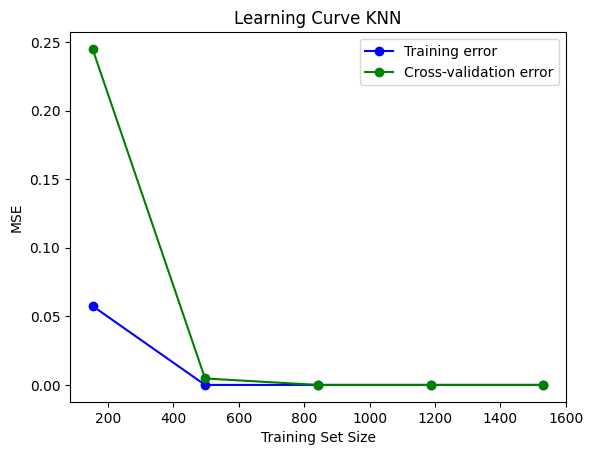

In [164]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve KNN")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

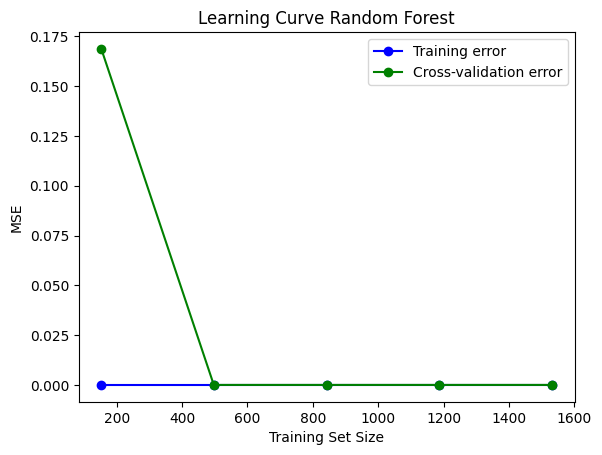

In [165]:
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

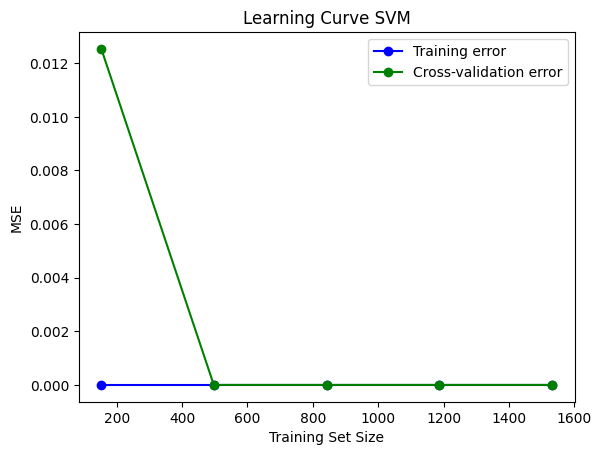

In [166]:
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [167]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")
print(f"K-Nearest Neighbors Precision: {precision_knn}")
print(f"K-Nearest Neighbors Recall: {recall_knn}")
print(f"K-Nearest Neighbors F1-Score: {f1_knn}")

K-Nearest Neighbors Accuracy: 1.0
K-Nearest Neighbors Precision: 1.0
K-Nearest Neighbors Recall: 1.0
K-Nearest Neighbors F1-Score: 1.0


In [168]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-Score: {f1_rf}")

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-Score: 1.0


In [169]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-Score: {f1_svm}")

SVM Accuracy: 1.0
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-Score: 1.0


In [170]:
eval_df = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_svm],
    'Precision': [precision_knn, precision_rf, precision_svm],
    'Recall': [recall_knn, recall_rf, recall_svm],
    'F1-Score': [f1_knn, f1_rf, f1_svm]
})
eval_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0


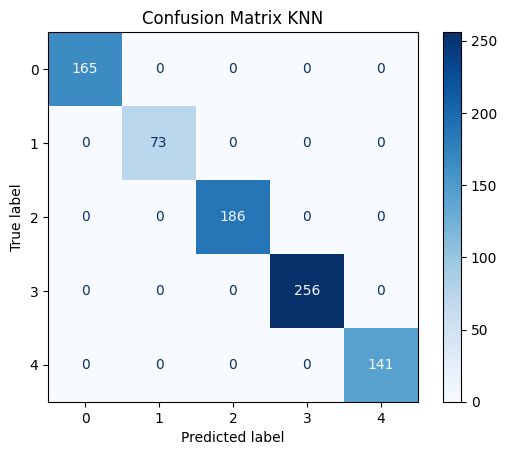

In [171]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.show()

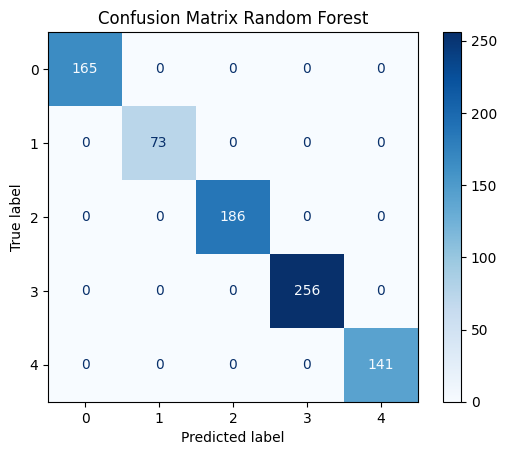

In [172]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.show()

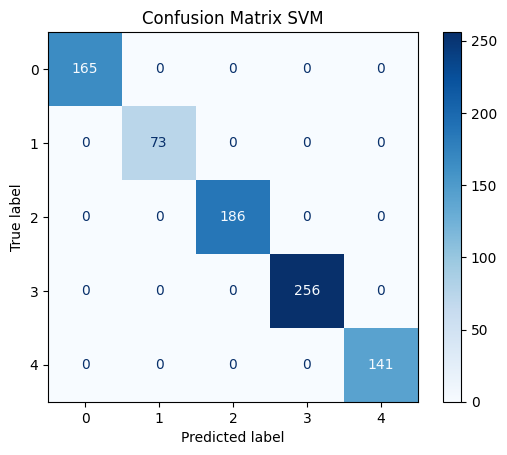

In [173]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix SVM")
plt.show()

Ketiga model menunjukkan kinerja yang sempurna, ditinjau dari beberapa matriks evaluasi seperti:
- accuracy, recall, precision, f1-score
- confusion matrix
- mean squared error

Berdasarkan learning curve ketiganya tidak menunjukkan adanya overfitting atau underfitting.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Model telah menunjukkan hasil prediksi yang sempurna pada data uji berdaksarkan metrik evaluasi. Berdasarkan Confusion Matrix dari ketiga metode juga menunjukkan tidak ada kesalahan klasifikasi. Berdasarkan evaluasi mean squared error pada masing-masing data latih dan data uji menunjukkan nilai 0. Setelah dicek melalui learning curve juga tidak menunjukkan adanya indikasi overfitting dan underfitting. Pada kenyataannya, evaluasi matrik (accuracy, recall, precision, f1-score) yang semuanya bernilai 1 sangat jarang terjadi. Jadi, diperlukan data tambahan dalam dataset karena model dapat mempelajari pola dengan sangat mudah.